In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('loan_data_original.csv')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# PREPROCESSING

In [4]:
for x in df.columns:
    print(f"{x} --> {np.dtype(df[x])}")

SK_ID_CURR --> int64
TARGET --> int64
NAME_CONTRACT_TYPE --> object
CODE_GENDER --> object
FLAG_OWN_CAR --> object
FLAG_OWN_REALTY --> object
CNT_CHILDREN --> int64
AMT_INCOME_TOTAL --> float64
AMT_CREDIT --> float64
AMT_ANNUITY --> float64
AMT_GOODS_PRICE --> float64
NAME_TYPE_SUITE --> object
NAME_INCOME_TYPE --> object
NAME_EDUCATION_TYPE --> object
NAME_FAMILY_STATUS --> object
NAME_HOUSING_TYPE --> object
REGION_POPULATION_RELATIVE --> float64
DAYS_BIRTH --> int64
DAYS_EMPLOYED --> int64
DAYS_REGISTRATION --> float64
DAYS_ID_PUBLISH --> int64
OWN_CAR_AGE --> float64
FLAG_MOBIL --> int64
FLAG_EMP_PHONE --> int64
FLAG_WORK_PHONE --> int64
FLAG_CONT_MOBILE --> int64
FLAG_PHONE --> int64
FLAG_EMAIL --> int64
OCCUPATION_TYPE --> object
CNT_FAM_MEMBERS --> float64
REGION_RATING_CLIENT --> int64
REGION_RATING_CLIENT_W_CITY --> int64
WEEKDAY_APPR_PROCESS_START --> object
HOUR_APPR_PROCESS_START --> int64
REG_REGION_NOT_LIVE_REGION --> int64
REG_REGION_NOT_WORK_REGION --> int64
LIVE_REGION

In [5]:
list_del = [
'SK_ID_CURR',
'DAYS_ID_PUBLISH',
'OWN_CAR_AGE',
'FLAG_MOBIL',
'FLAG_EMP_PHONE',
'FLAG_WORK_PHONE',
'FLAG_CONT_MOBILE',
'FLAG_PHONE',
'FLAG_EMAIL',
'REGION_RATING_CLIENT',
'REGION_RATING_CLIENT_W_CITY',
'WEEKDAY_APPR_PROCESS_START',
'HOUR_APPR_PROCESS_START',
'REG_REGION_NOT_LIVE_REGION',
'REG_REGION_NOT_WORK_REGION',
'LIVE_REGION_NOT_WORK_REGION',
'REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY',
'LIVE_CITY_NOT_WORK_CITY',
'EXT_SOURCE_1',
'EXT_SOURCE_2',
'EXT_SOURCE_3',
'APARTMENTS_AVG',
'BASEMENTAREA_AVG',
'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG',
'COMMONAREA_AVG',
'ELEVATORS_AVG',
'ENTRANCES_AVG',
'FLOORSMAX_AVG',
'FLOORSMIN_AVG',
'LANDAREA_AVG',
'LIVINGAPARTMENTS_AVG',
'LIVINGAREA_AVG',
'NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAREA_AVG',
'APARTMENTS_MODE',
'BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_MODE',
'COMMONAREA_MODE',
'ELEVATORS_MODE',
'ENTRANCES_MODE',
'FLOORSMAX_MODE',
'FLOORSMIN_MODE',
'LANDAREA_MODE',
'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAREA_MODE',
'APARTMENTS_MEDI',
'BASEMENTAREA_MEDI',
'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BUILD_MEDI',
'COMMONAREA_MEDI',
'ELEVATORS_MEDI',
'ENTRANCES_MEDI',
'FLOORSMAX_MEDI',
'FLOORSMIN_MEDI',
'LANDAREA_MEDI',
'LIVINGAPARTMENTS_MEDI',
'LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI',
'NONLIVINGAREA_MEDI',
'FONDKAPREMONT_MODE',
'HOUSETYPE_MODE',
'TOTALAREA_MODE',
'WALLSMATERIAL_MODE',
'EMERGENCYSTATE_MODE',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE',
'DAYS_LAST_PHONE_CHANGE',
'FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19',
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'ORGANIZATION_TYPE'
]

In [6]:
df = df.drop(columns=list_del, axis=1)

In [7]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,Laborers,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,Core staff,2.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,Laborers,1.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,Laborers,2.0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,Core staff,1.0


In [8]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,2.152665
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,0.910682
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,1.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,2.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,2.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,20.000000


In [9]:
df.isnull()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
307508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
dtype: int64

In [11]:
df = df.fillna({'AMT_ANNUITY': df['AMT_ANNUITY'].mean(), 
                'AMT_GOODS_PRICE': df['AMT_GOODS_PRICE'].mean(), 
                'NAME_TYPE_SUITE': 'Other',
                'OCCUPATION_TYPE': 'Other',
                'CNT_FAM_MEMBERS': df['CNT_FAM_MEMBERS'].mean()})

In [12]:
df.isnull().sum()

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      307511 non-null  int64  
 1   NAME_CONTRACT_TYPE          307511 non-null  object 
 2   CODE_GENDER                 307511 non-null  object 
 3   FLAG_OWN_CAR                307511 non-null  object 
 4   FLAG_OWN_REALTY             307511 non-null  object 
 5   CNT_CHILDREN                307511 non-null  int64  
 6   AMT_INCOME_TOTAL            307511 non-null  float64
 7   AMT_CREDIT                  307511 non-null  float64
 8   AMT_ANNUITY                 307511 non-null  float64
 9   AMT_GOODS_PRICE             307511 non-null  float64
 10  NAME_TYPE_SUITE             307511 non-null  object 
 11  NAME_INCOME_TYPE            307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMILY_ST

In [14]:
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH']) / 365
df['DAYS_EMPLOYED']= abs(df['DAYS_EMPLOYED']) / 365
df['DAYS_REGISTRATION'] = abs(df['DAYS_REGISTRATION']) / 365

df=df.rename(columns= {'NAME_CONTRACT_TYPE':'CONTRACT_TYPE',
                     'CODE_GENDER':'GENDER',
                     'NAME_TYPE_SUITE':'SUITE_TYPE',
                     'NAME_INCOME_TYPE':'INCOME_TYPE',
                     'NAME_EDUCATION_TYPE':'EDUCATION',
                     'NAME_FAMILY_STATUS':'FAMILY_STATUS',
                     'NAME_HOUSING_TYPE':'HOUSING_TYPE',
                     'DAYS_BIRTH':'AGE',
                     'DAYS_EMPLOYED':'YEARS_EMPLOYED', 
                     'DAYS_REGISTRATION':'YEARS_REGISTRATION',
                     'OCCUPATION_TYPE':'OCCUPATION'})

df['SUITE_TYPE']=np.where(df['SUITE_TYPE'] == 'Other_A', 'Other', df['SUITE_TYPE'])
df['SUITE_TYPE']=np.where(df['SUITE_TYPE'] == 'Other_B', 'Other', df['SUITE_TYPE'])

In [15]:
df.head()

,TARGET,CONTRACT_TYPE,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,OCCUPATION,CNT_FAM_MEMBERS
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,Laborers,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,Core staff,2.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,Laborers,1.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,Laborers,2.0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,Core staff,1.0


In [16]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,CNT_FAM_MEMBERS
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,43.936973,185.547239,13.660604,2.152665
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.454517,3.692794e+05,0.013831,11.956133,382.037676,9.651743,0.910679
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.517808,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.008219,2.556164,5.506849,2.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,43.150685,6.079452,12.339726,2.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,53.923288,15.635616,20.491781,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.120548,1000.665753,67.594521,20.000000


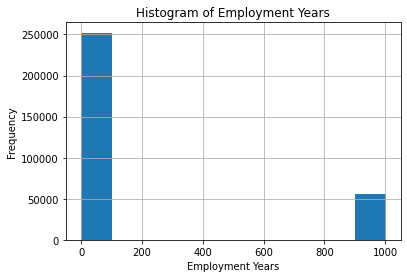

In [17]:
import matplotlib.pyplot as plt
import seaborn as sb

df.YEARS_EMPLOYED.hist()
plt.title('Histogram of Employment Years')
plt.xlabel('Employment Years')
plt.ylabel('Frequency')
plt.savefig('hist_emp')

In [20]:
emp_100 = (df['YEARS_EMPLOYED'] > 100)
median_value = df['YEARS_EMPLOYED'].median()
df.loc[emp_100, 'YEARS_EMPLOYED'] = median_value

In [21]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,CNT_FAM_MEMBERS
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,43.936973,6.450485,13.660604,2.152665
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.454517,3.692794e+05,0.013831,11.956133,5.803652,9.651743,0.910679
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.517808,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.008219,2.556164,5.506849,2.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,43.150685,6.079452,12.339726,2.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,53.923288,7.561644,20.491781,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.120548,49.073973,67.594521,20.000000


# DATASET DESCRIPTION

In [22]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sb

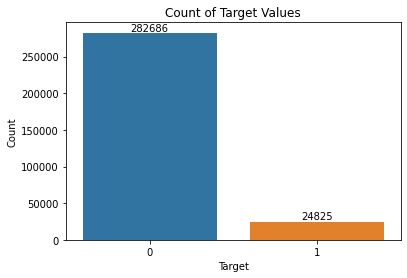

In [24]:
bp1 = sb.barplot(x=df['TARGET'].value_counts().index, y=df['TARGET'].value_counts())
bp1.bar_label(bp1.containers[0], fontsize=10)
bp1.set(xlabel='Target', ylabel='Count', title='Count of Target Values')
plt.show()

In [25]:
count_no_sub = len(df[df['TARGET']==0])
count_sub = len(df[df['TARGET']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Percentage of no default is ", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Percentage of default is ", pct_of_sub*100)

Percentage of no default is  91.92711805431351
Percentage of default is  8.072881945686495


In [26]:
df.groupby('TARGET').mean()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,CNT_FAM_MEMBERS
TARGET,,,,,,,,,,
0,0.412946,169077.722266,602648.282002,27163.621012,542732.848819,0.021021,44.214182,6.568580,13.780660,2.150154
1,0.463807,165611.760906,557778.527674,26481.744290,489014.221203,0.019131,40.780351,5.105719,12.293499,2.181269


In [27]:
df.groupby('GENDER').mean()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,CNT_FAM_MEMBERS
GENDER,,,,,,,,,,,
F,0.069993,0.392397,156032.309247,592766.717305,26304.847003,532411.8126,0.020728,45.212348,6.788559,14.197306,2.099814
M,0.101419,0.464548,193396.482153,611095.197084,28657.622196,549932.5332,0.021138,41.479591,5.798837,12.626471,2.254487
XNA,0.000000,0.750000,186750.000000,399375.000000,19968.750000,421875.0000,0.029672,37.154110,11.206849,11.333562,2.750000


In [28]:
df.groupby('EDUCATION').mean()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,CNT_FAM_MEMBERS
EDUCATION,,,,,,,,,,,
Academic degree,0.018293,0.378049,240009.146341,723515.625000,32490.576220,663118.902439,0.025019,44.467173,6.633177,12.425025,2.073171
Higher education,0.053551,0.459893,208652.053814,689950.456100,30803.524790,630232.609426,0.022492,41.496108,6.447594,12.110672,2.193168
Incomplete higher,0.084850,0.440401,181563.812397,566730.559161,27277.130347,512022.104950,0.022173,34.508284,4.629385,11.737944,2.098862
Lower secondary,0.109277,0.355870,130079.358491,489748.561321,22701.103924,430490.118874,0.018963,48.396419,5.972810,15.437133,2.039348
Secondary / secondary special,0.089399,0.402365,155158.512138,571193.392454,25907.008345,509948.209116,0.020280,45.139059,6.545382,14.252272,2.143353


In [29]:
df.groupby('CONTRACT_TYPE').mean()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,CNT_FAM_MEMBERS
CONTRACT_TYPE,,,,,,,,,,,
Cash loans,0.083459,0.410025,169069.513575,627965.732538,28244.214977,560563.664485,0.020748,44.271934,6.511534,13.724968,2.149307
Revolving loans,0.054783,0.483828,166217.017656,324017.982172,16316.822637,327743.660838,0.022014,40.753905,5.870346,13.048959,2.184580


In [30]:
df.groupby('FAMILY_STATUS').mean()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,CNT_FAM_MEMBERS
FAMILY_STATUS,,,,,,,,,,,
Civil marriage,0.099446,0.383913,167840.534651,541573.459647,25133.217318,481491.161628,0.020776,41.534404,5.727071,13.368578,2.383913
Married,0.075599,0.510833,171012.354904,642999.790770,28618.573428,579979.093168,0.020805,44.020417,6.730932,13.319769,2.510833
Separated,0.081942,0.356854,171231.793475,552113.820410,24971.410243,492962.836302,0.021252,46.360819,6.641274,14.162987,1.356854
Single / not married,0.098077,0.172454,167919.870329,505350.178835,24561.861142,451748.275142,0.021145,39.278016,5.298831,13.534793,1.172454
Unknown,0.000000,0.000000,326250.000000,630000.000000,31500.000000,538396.207429,0.023275,34.575342,1.908219,6.660274,2.152665
Widow,0.058242,0.098272,143001.647132,490695.908596,22147.097961,436580.239583,0.020561,57.547506,7.384340,18.101499,1.098272


In [31]:
df.groupby('HOUSING_TYPE').mean()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,CNT_FAM_MEMBERS
HOUSING_TYPE,,,,,,,,,,,
Co-op apartment,0.079323,0.533868,167651.322193,579700.696524,26932.267380,523236.446003,0.021787,38.958596,5.744710,13.478610,2.204991
House / apartment,0.077957,0.411719,169227.717311,605169.318500,27243.932384,544419.126486,0.020858,44.709856,6.588669,13.711649,2.160620
Municipal apartment,0.085397,0.407494,168002.934007,599576.729321,26956.204022,529656.386527,0.023801,45.443979,6.868180,16.823903,2.083980
Office apartment,0.065724,0.521972,187906.542988,626230.575086,28446.609859,562601.350942,0.019184,41.633998,7.012092,11.720026,2.269010
Rented apartment,0.123131,0.487810,167460.213891,525562.492624,25895.485674,470190.350346,0.018657,35.928718,4.366781,10.562703,2.145257
With parents,0.116981,0.471698,158651.069555,506478.160916,24910.879549,453548.007967,0.019801,32.006587,4.234560,11.713152,2.036119


In [32]:
df.groupby('OCCUPATION').mean()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,CNT_FAM_MEMBERS
OCCUPATION,,,,,,,,,,,
Accountants,0.048303,0.488536,194578.357842,709757.377255,30982.712379,648512.394964,0.022154,40.536514,6.559186,12.461991,2.233278
Cleaning staff,0.096067,0.363421,130790.895551,510960.949710,22901.733075,449595.106391,0.019903,47.336587,5.838886,15.322990,2.034601
Cooking staff,0.104440,0.483855,138396.508176,539174.315843,25083.154486,476564.236839,0.019635,41.495576,5.897170,13.186291,2.224184
Core staff,0.063040,0.558070,172656.695254,625223.129380,27557.847736,565063.606169,0.020895,38.657445,7.665085,11.988247,2.312223
Drivers,0.113261,0.511853,187011.606413,612333.969037,29071.076470,547804.722260,0.020876,41.378380,5.312424,12.677204,2.339193
HR staff,0.063943,0.440497,188916.282416,684983.277975,30227.563055,621455.595027,0.022496,39.320129,6.243471,12.079170,2.163410
High skill tech staff,0.061599,0.473989,182842.045683,642911.751538,28649.135376,581749.894936,0.022056,40.427600,7.506792,12.699825,2.211072
IT staff,0.064639,0.397338,213465.601711,647597.797529,29021.004753,593784.313132,0.023980,35.293515,5.741289,11.577921,2.051331
Laborers,0.105788,0.511742,166357.482525,570617.995597,26441.051193,507797.523489,0.020157,40.293388,6.641488,12.904079,2.276664


In [33]:
df.groupby('FLAG_OWN_CAR').mean()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,CNT_FAM_MEMBERS
FLAG_OWN_CAR,,,,,,,,,,,
N,0.085002,0.364161,154603.326933,565442.540961,25635.369260,506508.122253,0.020458,45.051783,6.520143,14.268742,2.054662
Y,0.072437,0.519673,196338.851352,664186.007950,29966.946176,600266.782129,0.021664,41.773973,6.315332,12.480668,2.342815


In [34]:
df.groupby('FLAG_OWN_REALTY').mean()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,CNT_FAM_MEMBERS
FLAG_OWN_REALTY,,,,,,,,,,,
N,0.083249,0.419622,167750.922371,622810.942568,27222.529328,563692.049044,0.020552,41.79333,6.223237,13.294253,2.142592
Y,0.079616,0.415917,169260.275205,588522.522017,27058.250971,527225.513871,0.021008,44.88361,6.550838,13.822385,2.157114


In [35]:
numeric_columns=df.select_dtypes(include=['int64', 'float64'])
cor1=numeric_columns.corr()
cor1

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,CNT_FAM_MEMBERS
TARGET,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039628,-0.037227,-0.078239,-0.068665,-0.041975,0.009308
CNT_CHILDREN,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001826,-0.025573,-0.330938,-0.051275,-0.183395,0.879160
AMT_INCOME_TOTAL,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159600,0.074796,-0.027261,0.014768,-0.027805,0.016342
AMT_CREDIT,-0.030369,0.002145,0.156870,1.000000,0.770127,0.986588,0.099738,0.055436,0.085424,-0.009621,0.063160
AMT_ANNUITY,-0.012817,0.021374,0.191657,0.770127,1.000000,0.774661,0.118424,-0.009445,0.052136,-0.038513,0.075539
AMT_GOODS_PRICE,-0.039628,-0.001826,0.159600,0.986588,0.774661,1.000000,0.103482,0.053416,0.087249,-0.011561,0.061153
REGION_POPULATION_RELATIVE,-0.037227,-0.025573,0.074796,0.099738,0.118424,0.103482,1.000000,0.029582,-0.003651,0.053820,-0.024209
AGE,-0.078239,-0.330938,-0.027261,0.055436,-0.009445,0.053416,0.029582,1.000000,0.249056,0.331912,-0.278893
YEARS_EMPLOYED,-0.068665,-0.051275,0.014768,0.085424,0.052136,0.087249,-0.003651,0.249056,1.000000,0.137143,-0.020023
YEARS_REGISTRATION,-0.041975,-0.183395,-0.027805,-0.009621,-0.038513,-0.011561,0.053820,0.331912,0.137143,1.000000,-0.173416


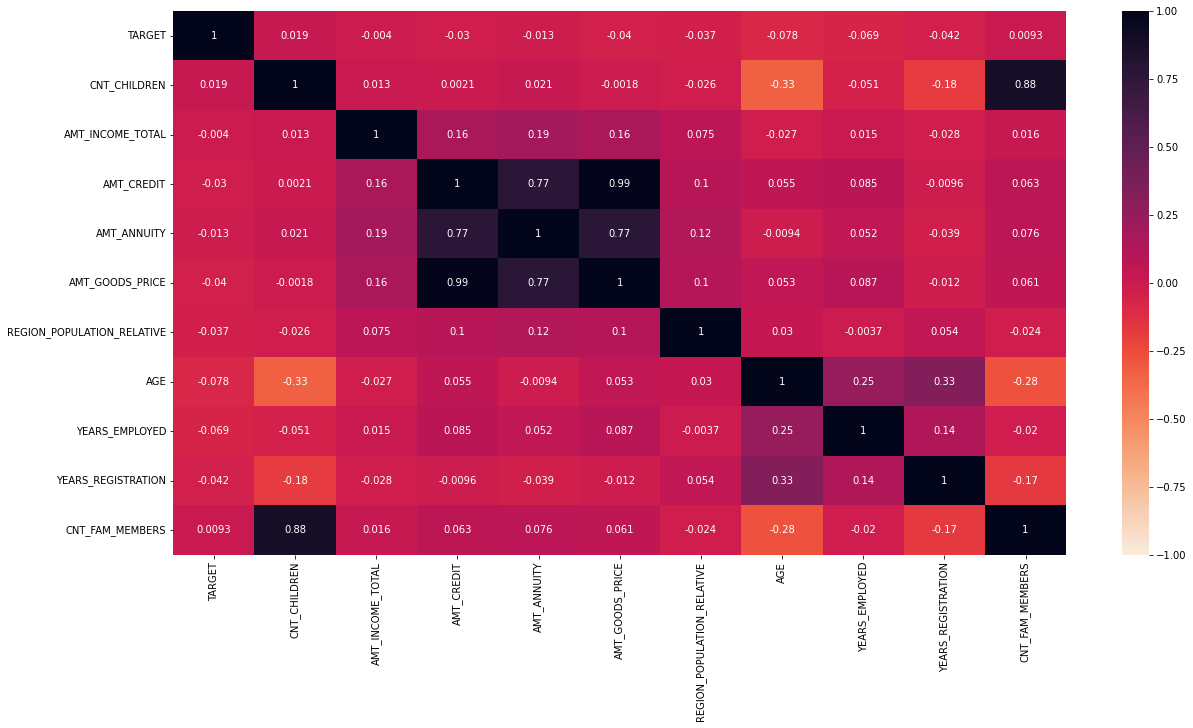

In [36]:
fig, ax = plt.subplots(figsize=(20,10)) 
sb.heatmap(cor1, vmin=-1, vmax=1,
annot=True,cmap="rocket_r",ax=ax)
plt.show()

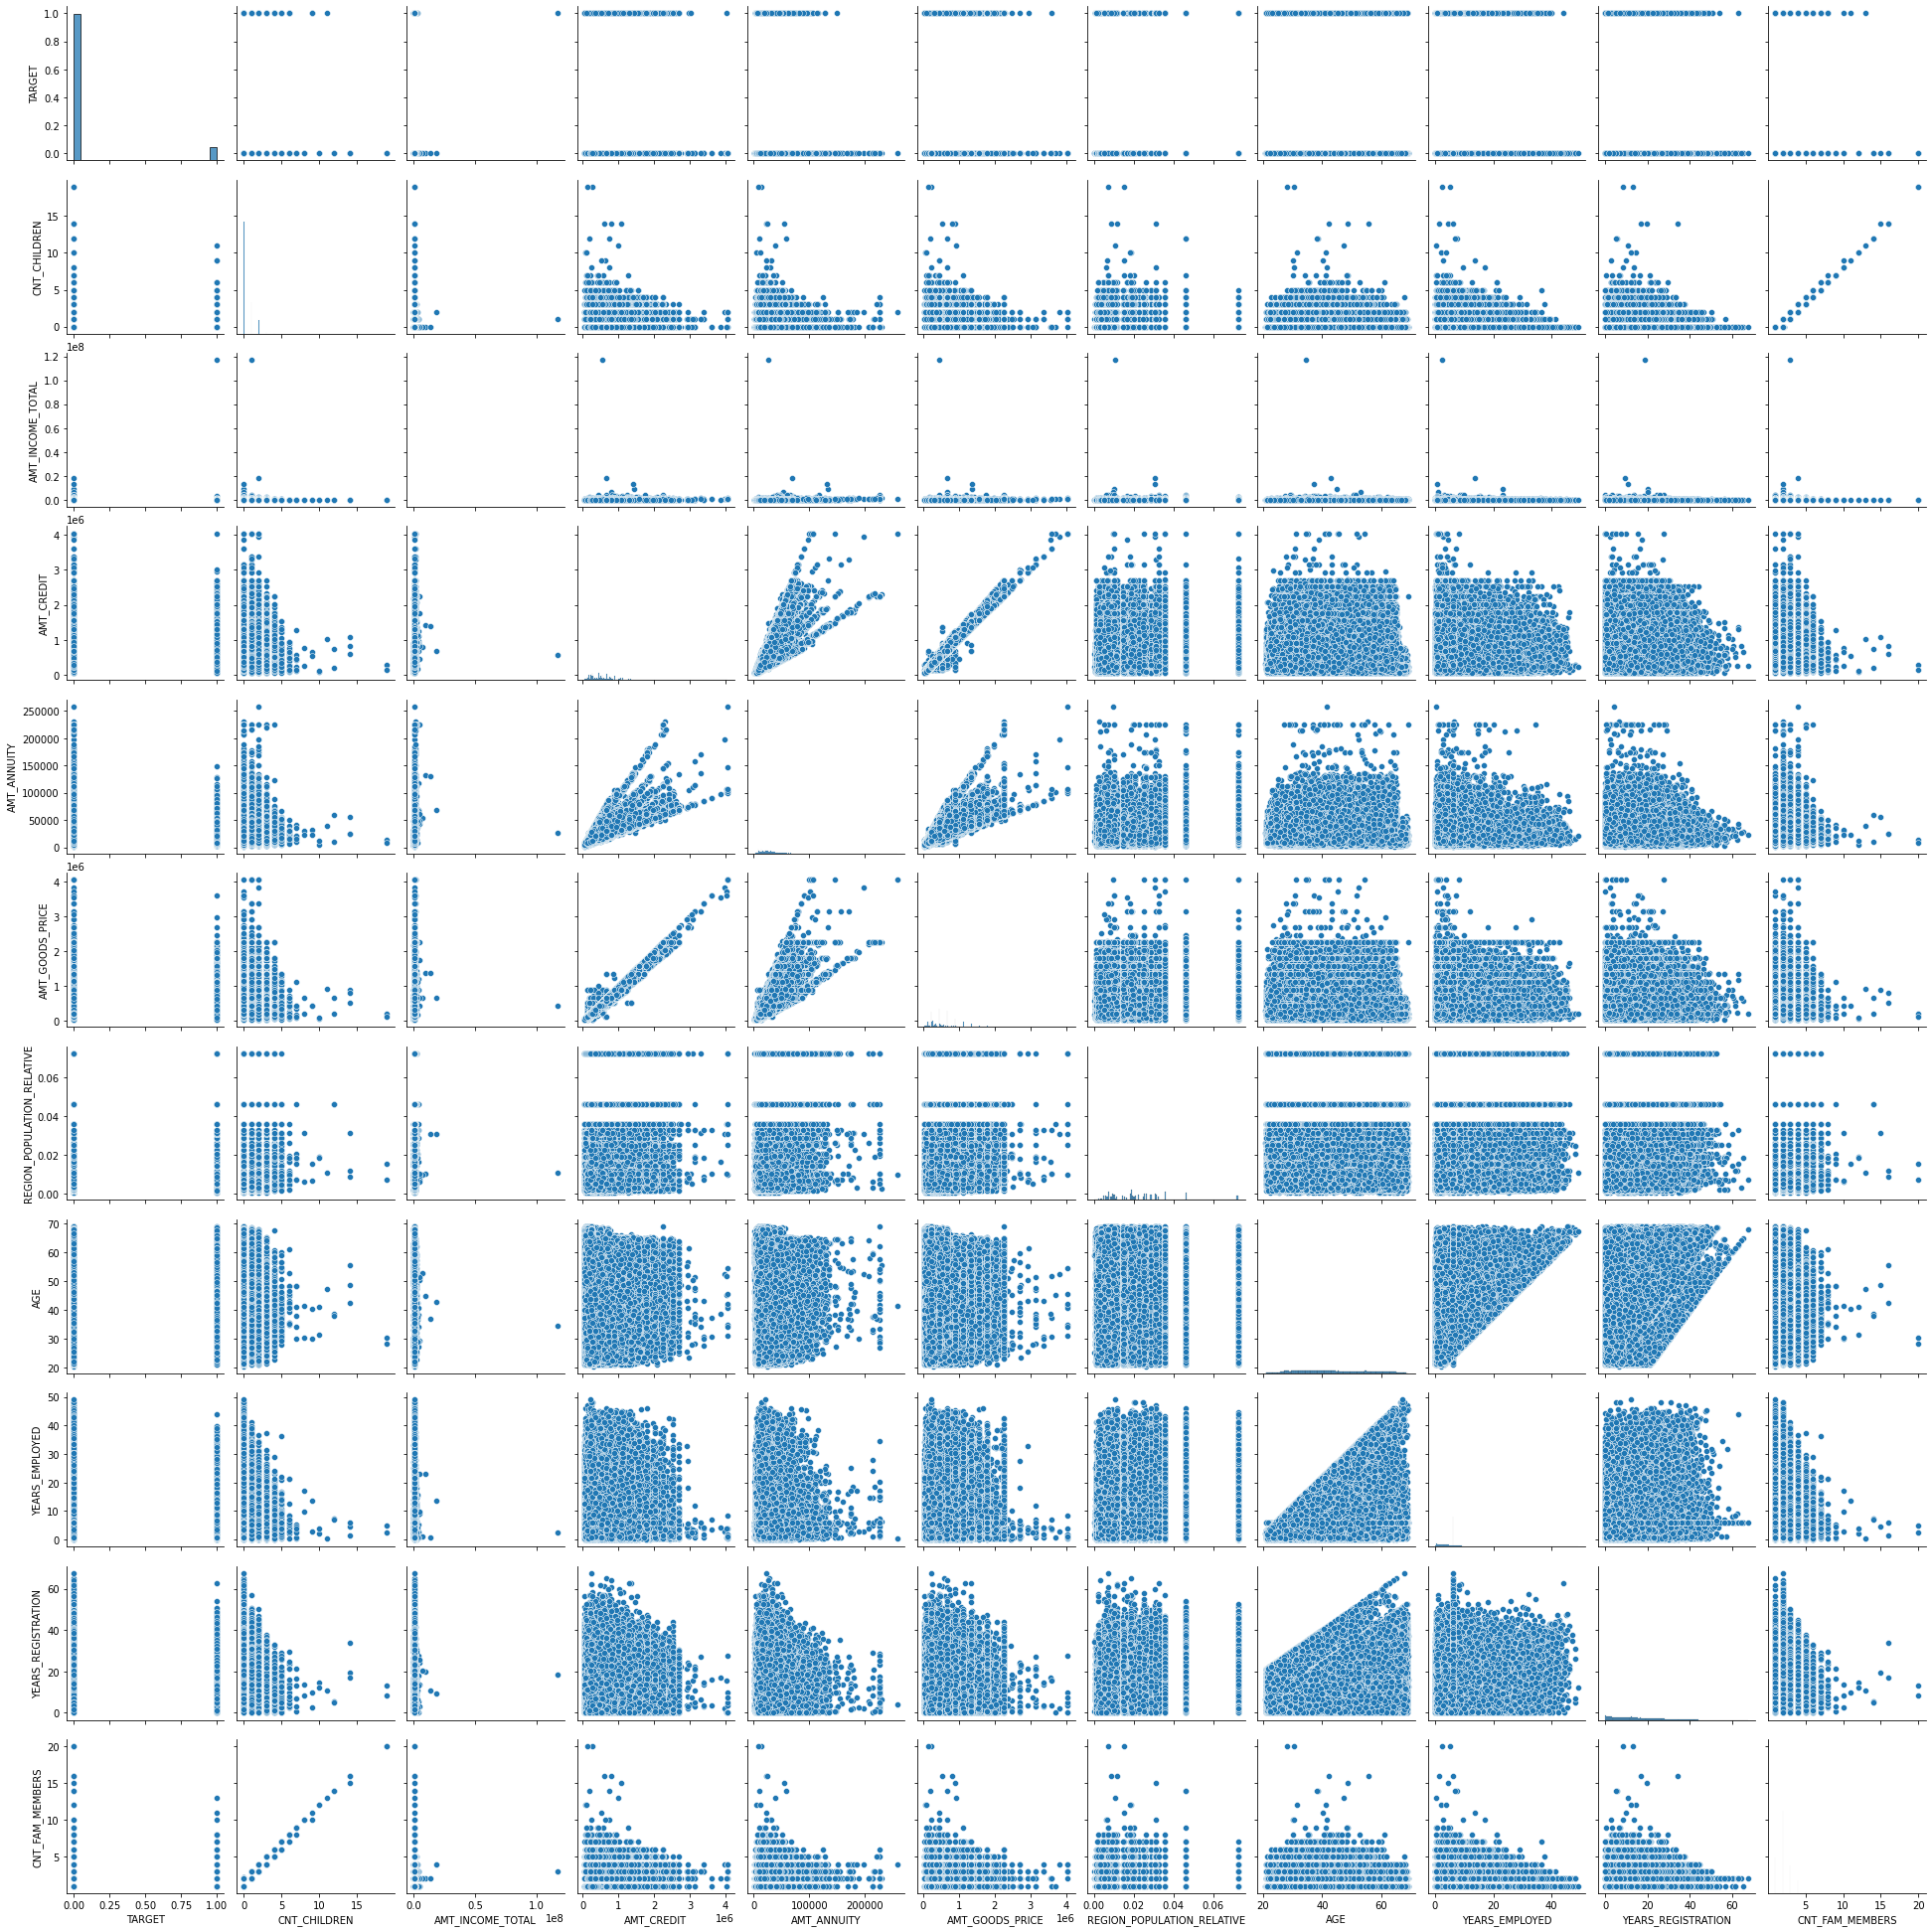

In [37]:
sb.pairplot(numeric_columns)

#### Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ['CONTRACT_TYPE', 
                       'GENDER', 
                       'FLAG_OWN_CAR', 
                       'FLAG_OWN_REALTY',
                       'SUITE_TYPE', 
                       'INCOME_TYPE', 
                       'EDUCATION', 
                       'FAMILY_STATUS', 
                       'HOUSING_TYPE', 
                       'OCCUPATION']

label_mapping_dfs = {}

# Iterate through the columns and create label mapping DataFrames
for column in categorical_columns:
    label_encoder.fit(df[column])
    original_labels = list(label_encoder.classes_)
    encoded_values = list(range(len(original_labels)))
    mapping_df = pd.DataFrame({'Original Label': original_labels, 'Encoded Value': encoded_values})
    label_mapping_dfs[column] = mapping_df

# Display label mapping DataFrames for each column
for column, mapping_df in label_mapping_dfs.items():
    print(f"Label Mapping for Column: {column}")
    print(mapping_df)
    print('\n')
    
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])



Label Mapping for Column: CONTRACT_TYPE
    Original Label  Encoded Value
0       Cash loans              0
1  Revolving loans              1


Label Mapping for Column: GENDER
  Original Label  Encoded Value
0              F              0
1              M              1
2            XNA              2


Label Mapping for Column: FLAG_OWN_CAR
  Original Label  Encoded Value
0              N              0
1              Y              1


Label Mapping for Column: FLAG_OWN_REALTY
  Original Label  Encoded Value
0              N              0
1              Y              1


Label Mapping for Column: SUITE_TYPE
    Original Label  Encoded Value
0         Children              0
1           Family              1
2  Group of people              2
3            Other              3
4  Spouse, partner              4
5    Unaccompanied              5


Label Mapping for Column: INCOME_TYPE
         Original Label  Encoded Value
0           Businessman              0
1  Commercial associate

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      307511 non-null  int64  
 1   CONTRACT_TYPE               307511 non-null  int64  
 2   GENDER                      307511 non-null  int64  
 3   FLAG_OWN_CAR                307511 non-null  int64  
 4   FLAG_OWN_REALTY             307511 non-null  int64  
 5   CNT_CHILDREN                307511 non-null  int64  
 6   AMT_INCOME_TOTAL            307511 non-null  float64
 7   AMT_CREDIT                  307511 non-null  float64
 8   AMT_ANNUITY                 307511 non-null  float64
 9   AMT_GOODS_PRICE             307511 non-null  float64
 10  SUITE_TYPE                  307511 non-null  int64  
 11  INCOME_TYPE                 307511 non-null  int64  
 12  EDUCATION                   307511 non-null  int64  
 13  FAMILY_STATUS 

#### Back to Dataset Description

In [40]:
cor2=df.corr()
cor2

,TARGET,CONTRACT_TYPE,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,OCCUPATION,CNT_FAM_MEMBERS
TARGET,1.000000,-0.030896,0.054692,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012817,-0.039628,...,0.046829,0.054699,-0.004127,0.034489,-0.037227,-0.078239,-0.068665,-0.041975,-0.000118,0.009308
CONTRACT_TYPE,-0.030896,1.000000,-0.008613,0.004022,0.067177,0.029998,-0.003531,-0.221648,-0.241543,-0.185049,...,0.005428,-0.065086,0.011272,0.024190,0.026867,-0.086364,-0.032427,-0.020557,-0.013558,0.011368
GENDER,0.054692,-0.008613,1.000000,0.345833,-0.044340,0.047403,0.074728,0.021572,0.076960,0.022485,...,0.065089,0.009554,-0.099713,0.058767,0.014082,-0.148080,-0.080834,-0.077191,-0.104132,0.080573
FLAG_OWN_CAR,-0.021851,0.004022,0.345833,1.000000,-0.002817,0.102023,0.083383,0.116225,0.141586,0.120282,...,0.033186,-0.093977,-0.131014,-0.004041,0.041314,-0.129879,-0.016719,-0.087766,-0.094011,0.149901
FLAG_OWN_REALTY,-0.006148,0.067177,-0.044340,-0.002817,1.000000,-0.002366,0.002934,-0.039270,-0.005225,-0.045521,...,-0.026539,0.022130,0.000521,-0.199722,0.015175,0.119146,0.026020,0.025224,0.026533,0.007351
CNT_CHILDREN,0.019187,0.029998,0.047403,0.102023,-0.002366,1.000000,0.012882,0.002145,0.021374,-0.001826,...,0.102547,-0.034128,-0.165475,0.021737,-0.025573,-0.330938,-0.051275,-0.183395,-0.083970,0.879160
AMT_INCOME_TOTAL,-0.003982,-0.003531,0.074728,0.083383,0.002934,0.012882,1.000000,0.156870,0.191657,0.159600,...,-0.044451,-0.096219,-0.019503,-0.007634,0.074796,-0.027261,0.014768,-0.027805,-0.030166,0.016342
AMT_CREDIT,-0.030369,-0.221648,0.021572,0.116225,-0.039270,0.002145,0.156870,1.000000,0.770127,0.986588,...,-0.071794,-0.120821,-0.101622,-0.054356,0.099738,0.055436,0.085424,-0.009621,-0.042960,0.063160
AMT_ANNUITY,-0.012817,-0.241543,0.076960,0.141586,-0.005225,0.021374,0.191657,0.770127,1.000000,0.774661,...,-0.073018,-0.141667,-0.102533,-0.033667,0.118424,-0.009445,0.052136,-0.038513,-0.050564,0.075539
AMT_GOODS_PRICE,-0.039628,-0.185049,0.022485,0.120282,-0.045521,-0.001826,0.159600,0.986588,0.774661,1.000000,...,-0.072398,-0.133937,-0.102695,-0.055451,0.103482,0.053416,0.087249,-0.011561,-0.043596,0.061153


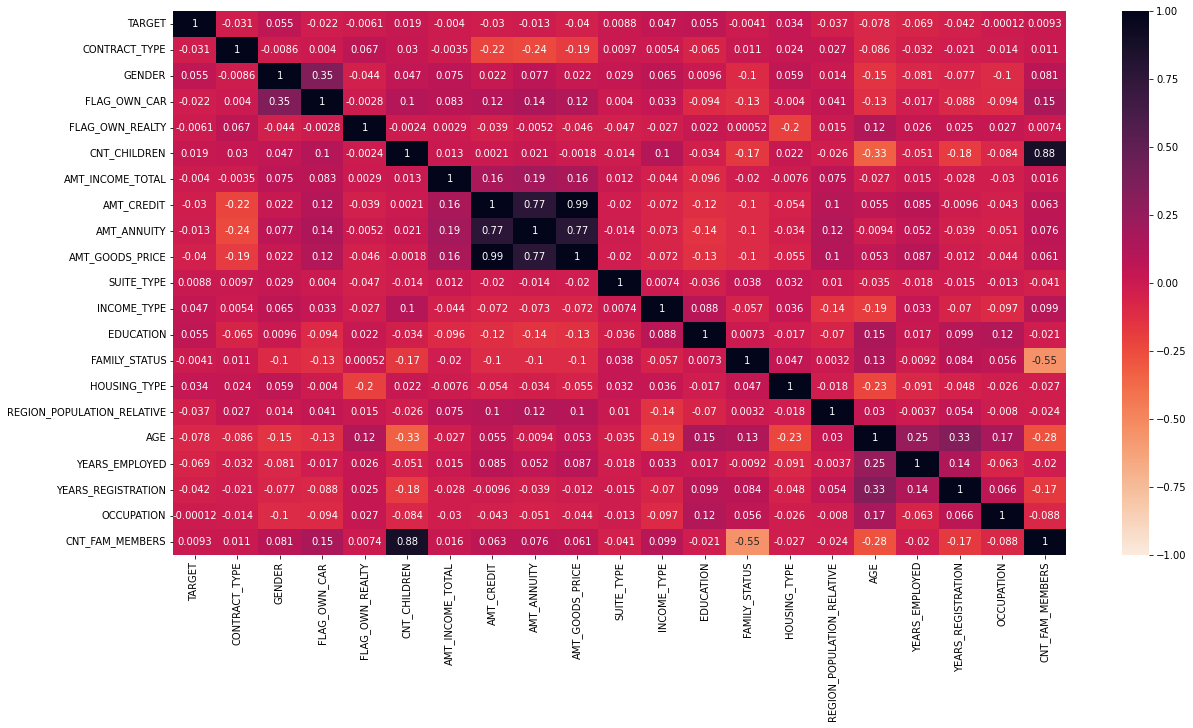

In [45]:
fig, ax = plt.subplots(figsize=(20,10)) 
sb.heatmap(cor2, vmin=-1, vmax=1,
annot=True,cmap="rocket_r",ax=ax)
plt.show()

## VISUALIZATIONS

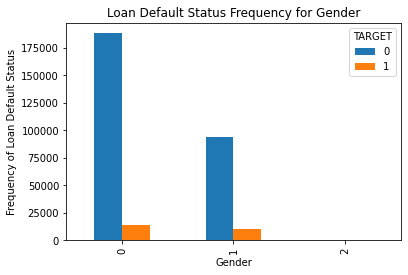

In [46]:
%matplotlib inline
pd.crosstab(df.GENDER, df.TARGET).plot(kind='bar')
plt.title('Loan Default Status Frequency for Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Loan Default Status')
plt.savefig('ld_fre_gender')

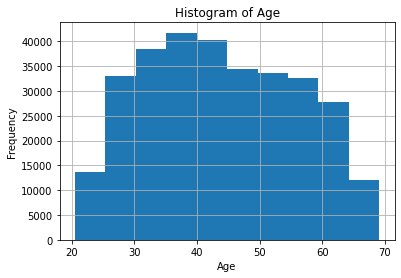

In [49]:
df.AGE.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

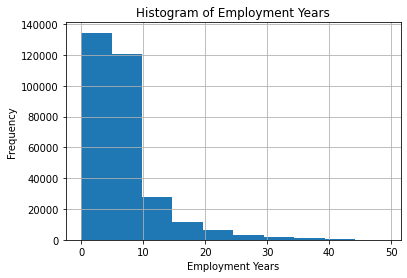

In [50]:
df.YEARS_EMPLOYED.hist()
plt.title('Histogram of Employment Years')
plt.xlabel('Employment Years')
plt.ylabel('Frequency')
plt.savefig('hist_emp')

# TEST DATA PREPARATION

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_cols_num= [c for c in numeric_columns if c not in ['TARGET']]
x_cols=[c for c in df.columns if c not in ['TARGET']]
x_num=df[x_cols_num]
x=df[x_cols]
y=df['TARGET']

In [53]:
x_train_num,x_test_num,y_train_num,y_test_num = train_test_split(x_num,y,test_size=0.3,random_state=42,stratify=y)

In [54]:
x_train_num.shape

(215257, 10)

In [47]:
x_test_num.shape

(92254, 10)

In [48]:
y_test_num.value_counts()

0    84806
1     7448
Name: TARGET, dtype: int64

In [49]:
y_train_num.value_counts()

0    197880
1     17377
Name: TARGET, dtype: int64

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [51]:
x_train.shape

(215257, 20)

In [52]:
x_test.shape

(92254, 20)

In [53]:
y_test.value_counts()

0    84806
1     7448
Name: TARGET, dtype: int64

In [54]:
y_train.value_counts()

0    197880
1     17377
Name: TARGET, dtype: int64

# SAMPLING

In [55]:
train_data = pd.concat([x_train, y_train], axis=1)
minority_class = train_data[train_data['TARGET'] == 1]
majority_class = train_data[train_data['TARGET'] == 0]

In [56]:
from sklearn.utils import resample

majority_downsampled = resample(majority_class,
                                replace=False,
                                n_samples=len(minority_class),
                                random_state=42)

downsampled_data = pd.concat([majority_downsampled, minority_class])

x_train_us = downsampled_data.drop('TARGET', axis=1)
y_train_us = downsampled_data['TARGET']

y_train_us.value_counts()

0    17377
1    17377
Name: TARGET, dtype: int64

In [57]:
minority_oversampled = resample(minority_class,
                                replace=True,
                                n_samples=len(majority_class),
                                random_state=42)

downsampled_data = pd.concat([minority_oversampled, majority_class])

x_train_os = downsampled_data.drop('TARGET', axis=1)
y_train_os = downsampled_data['TARGET']

y_train_os.value_counts()

1    197880
0    197880
Name: TARGET, dtype: int64

# DESCRIPTIVE MODEL

## KMeans Clustering

In [58]:
from sklearn.cluster import KMeans

C:\Users\sevgi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sevgi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sevgi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sevgi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

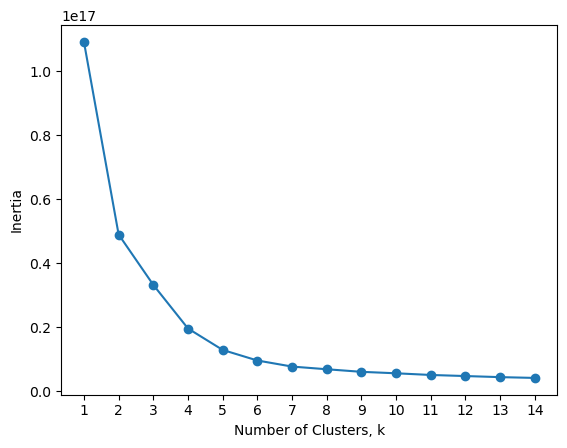

In [59]:
un_list = ['TARGET']

cols=df.drop(columns=un_list, axis=1)

ks=range(1,15)
inertias=[]

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(cols)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [60]:
cluster1=KMeans(n_clusters=4)
num_labels=cluster1.fit_predict(cols)
centroid1=cluster1.cluster_centers_
centroid1

C:\Users\sevgi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[2.98817047e-02, 3.40182574e-01, 3.66650462e-01, 6.90973910e-01,
        4.18451899e-01, 1.88961121e+05, 8.17250234e+05, 3.40677819e+04,
        7.25673460e+05, 4.32568465e+00, 4.58747907e+00, 3.14675093e+00,
        1.39270783e+00, 1.24415276e+00, 2.14280626e-02, 4.46818190e+01,
        6.84561199e+00, 1.37471856e+01, 9.20438611e+00, 2.19173884e+00],
       [1.43151322e-01, 3.39035029e-01, 3.05029671e-01, 7.01718259e-01,
        4.17746114e-01, 1.43842974e+05, 3.30065698e+05, 1.95714113e+04,
        2.95127950e+05, 4.38564501e+00, 4.78619747e+00, 3.28085559e+00,
        1.55481378e+00, 1.33180550e+00, 2.00056671e-02, 4.32878916e+01,
        6.05641745e+00, 1.36408659e+01, 9.41115872e+00, 2.11350804e+00],
       [1.90395661e-02, 3.59564977e-01, 4.53246640e-01, 6.58570720e-01,
        4.09598507e-01, 2.42414357e+05, 1.42671503e+06, 4.80257148e+04,
        1.31428591e+06, 4.31276788e+00, 4.28320261e+00, 2.81266583e+00,
        1.25261685e+00, 1.19704347e+00, 2.38997873e-02, 4.5345

C:\Users\sevgi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


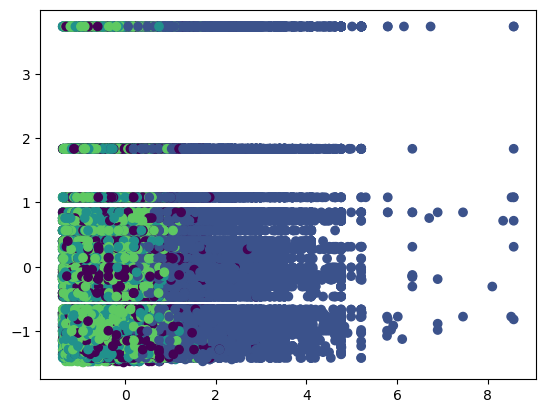

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler=StandardScaler()
pipeline=make_pipeline(scaler, cluster1)

scaled_cols=scaler.fit_transform(cols)
scaled_cols.var(axis=0)

scaled_cols=pd.DataFrame(scaled_cols)
scaled_cols.columns=[
'CONTRACT_TYPE',
'GENDER',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
'SUITE_TYPE',
'INCOME_TYPE',
'EDUCATION',
'FAMILY_STATUS',
'HOUSING_TYPE',
'REGION_POPULATION_RELATIVE',
'AGE',
'YEARS_EMPLOYED',
'YEARS_REGISTRATION',
'OCCUPATION',
'CNT_FAM_MEMBERS'
]

labels_s=KMeans(n_clusters=5,).fit_predict(scaled_cols)
xs=scaled_cols['AMT_CREDIT']
ys=scaled_cols['REGION_POPULATION_RELATIVE']
zs=scaled_cols['CNT_FAM_MEMBERS']

plt.scatter(xs, ys, c=labels_s)
plt.show()

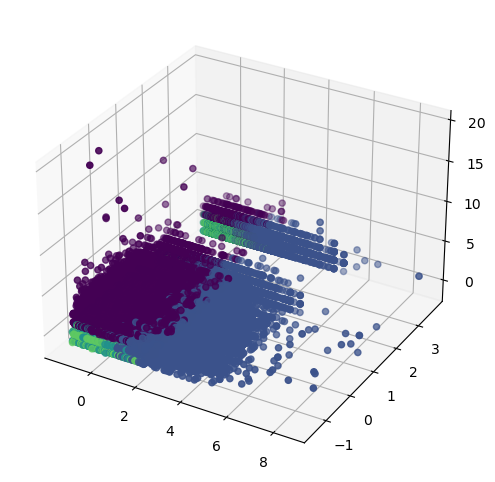

In [62]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(xs, ys, zs, c=labels_s, cmap='viridis')

# ax.mouse_init()

# def update(frame):
  #  ax.cla()
   # ax.set_xlim(0, 1)
  #  ax.set_ylim(0, 1)
  #  ax.set_zlim(0, 1)
  #  ax.scatter(xs, ys, zs, c=labels_s, cmap='viridis')
  #  ax.view_init(elev=10, azim=frame)
  #  return sc,

# Create the animation
# ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 1), repeat=False, blit=True)

plt.show()

## KModes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 49708, cost: 732007.0
Run 1, iteration: 2/100, moves: 14424, cost: 732007.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 79500, cost: 781197.0
Run 2, iteration: 2/100, moves: 673, cost: 781197.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 83192, cost: 752088.0
Run 3, iteration: 2/100, moves: 17921, cost: 752088.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 21718, cost: 856438.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 60825, cost: 807059.0
Best run was number 1


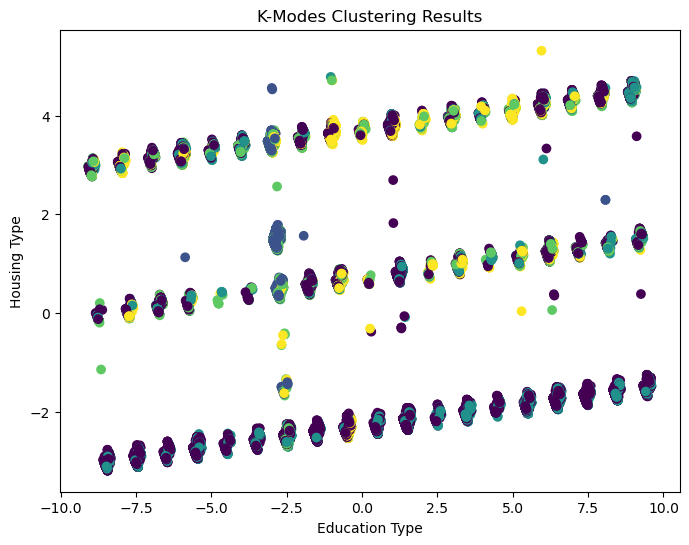

In [63]:
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA

n_clusters = 5
km = KModes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(df[categorical_columns])
df['Cluster'] = km.labels_

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df[categorical_columns])

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('K-Modes Clustering Results')
plt.xlabel('Education Type')
plt.ylabel('Housing Type')
plt.show()

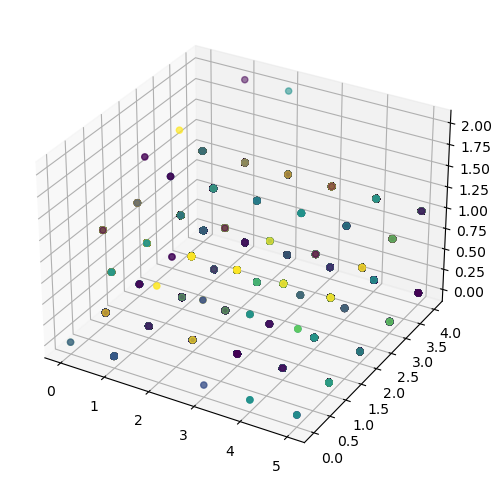

In [64]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['HOUSING_TYPE'], df['EDUCATION'], df['GENDER'], c=clusters, cmap='viridis')
plt.show()

In [65]:
reduced_data

array([[ 1.43847045, -2.22319686],
       [ 6.27620174,  1.35520845],
       [ 1.4502    , -2.22691351],
       ...,
       [-0.43287711, -2.1898713 ],
       [ 0.9461056 ,  3.68902098],
       [ 1.06304834,  3.90377423]])

# PREDICTIVE MODELS

## Classifiers

### Decision Tree

#### Not successful

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from sklearn import tree

In [67]:
dt1=DecisionTreeClassifier()

In [68]:
num_features_to_test = range(1, len(x.columns) + 1)

In [69]:
for num_features in num_features_to_test:
    # Create RFE model and select 'num_features' features
    rfe = RFE(dt1, n_features_to_select=num_features)
    x_train_selected = rfe.fit_transform(x_train, y_train)
    x_test_selected = rfe.transform(x_test)

    # Get the selected feature indices
    selected_feature_indices = rfe.get_support()

    # Get the names of the selected features
    selected_feature_names = x.columns[selected_feature_indices]

    # Train Decision Tree on the selected features
    dt1.fit(x_train_selected, y_train)

    # Make predictions
    pred_dt1 = dt1.predict(x_test_selected)
    
    # Confusion matrix
    cm_dt1 = confusion_matrix(y_test, pred_dt1)
    
    # Classification report
    cr_dt1 = classification_report(y_test, pred_dt1)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, pred_dt1)
    
    print(f"Number of Features: {num_features}")
    print(f"Selected Features: {selected_feature_names}")
    print(f"Accuracy: {accuracy}\n")
    print(f"Confusion matrix:\n {cm_dt1}\n")
    print(f"Classification report:\n {cr_dt1}\n")
    print("\n")

Number of Features: 1
Selected Features: Index(['YEARS_REGISTRATION'], dtype='object')
Accuracy: 0.9186593535239664

Confusion matrix:
 [[84745    61]
 [ 7443     5]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.08      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.50      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254




Number of Features: 2
Selected Features: Index(['AGE', 'YEARS_REGISTRATION'], dtype='object')
Accuracy: 0.8484618553125067

Confusion matrix:
 [[77570  7236]
 [ 6744   704]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92     84806
           1       0.09      0.09      0.09      7448

    accuracy                           0.85     92254
   macro avg       0.50      0.50      0.50     92254
weighte

Number of Features: 14
Selected Features: Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'SUITE_TYPE', 'FAMILY_STATUS', 'HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'AGE', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'OCCUPATION', 'CNT_FAM_MEMBERS'],
      dtype='object')
Accuracy: 0.8425108938365816

Confusion matrix:
 [[76723  8083]
 [ 6446  1002]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91     84806
           1       0.11      0.13      0.12      7448

    accuracy                           0.84     92254
   macro avg       0.52      0.52      0.52     92254
weighted avg       0.86      0.84      0.85     92254




Number of Features: 15
Selected Features: Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'SUITE_TYPE', 'INCOME_TYPE', 'FAMILY_STATUS',
       'HOUSING_TYPE', 'REGION_POPULATION_REL

In [70]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

importances = dt1.feature_importances_

# Get the indices that would sort the importances array in descending order
sorted_indices = np.argsort(importances)[::-1]

# Print the feature names and their importance scores in descending order
for idx in sorted_indices:
    print(f"Feature: {x_train.columns[idx]}, Importance: {importances[idx]}")

Feature: AGE, Importance: 0.13858542313024075
Feature: YEARS_REGISTRATION, Importance: 0.13837210179371817
Feature: YEARS_EMPLOYED, Importance: 0.12102129060354806
Feature: AMT_ANNUITY, Importance: 0.10585919864882526
Feature: REGION_POPULATION_RELATIVE, Importance: 0.09300271664096289
Feature: AMT_INCOME_TOTAL, Importance: 0.07996416330293844
Feature: AMT_CREDIT, Importance: 0.07703940564915482
Feature: AMT_GOODS_PRICE, Importance: 0.05423101690194479
Feature: OCCUPATION, Importance: 0.04638239066971609
Feature: FAMILY_STATUS, Importance: 0.0249174067566399
Feature: CNT_FAM_MEMBERS, Importance: 0.01821177484849981
Feature: SUITE_TYPE, Importance: 0.016360678337374465
Feature: HOUSING_TYPE, Importance: 0.015818531059150365
Feature: INCOME_TYPE, Importance: 0.014668904578115668
Feature: CNT_CHILDREN, Importance: 0.013194012112442676
Feature: FLAG_OWN_REALTY, Importance: 0.012157638312038982
Feature: EDUCATION, Importance: 0.010763037579179896
Feature: FLAG_OWN_CAR, Importance: 0.0090506

In [71]:
for num_features in num_features_to_test:
    # Get the indices of the first 'num_features' features from the sorted list
    selected_indices = sorted_indices[:num_features]

    # Select features based on the indices
    x_train_selected = x_train.iloc[:, selected_indices]
    x_test_selected = x_test.iloc[:, selected_indices]

    # Train Decision Tree on the selected features
    dt1.fit(x_train_selected, y_train)

    # Make predictions
    pred_dt1 = dt1.predict(x_test_selected)

    # Confusion matrix
    cm_dt1 = confusion_matrix(y_test, pred_dt1)

    # Classification report
    cr_dt1 = classification_report(y_test, pred_dt1)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, pred_dt1)

    print(f"Number of Features: {num_features}")
    print(f"Selected Features: {x_train.columns[selected_indices].tolist()}")
    print(f"Accuracy: {accuracy}\n")
    print(f"Confusion matrix:\n{cm_dt1}\n")
    print(f"Classification report:\n{cr_dt1}\n")
    print("\n")

Number of Features: 1
Selected Features: ['AGE']
Accuracy: 0.9186485138855768

Confusion matrix:
[[84744    62]
 [ 7443     5]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.07      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.50      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254




Number of Features: 2
Selected Features: ['AGE', 'YEARS_REGISTRATION']
Accuracy: 0.8478656752010753

Confusion matrix:
[[77524  7282]
 [ 6753   695]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     84806
           1       0.09      0.09      0.09      7448

    accuracy                           0.85     92254
   macro avg       0.50      0.50      0.50     92254
weighted avg       0.85      0.85      0.85     92254




Number of Feat

Number of Features: 15
Selected Features: ['AGE', 'YEARS_REGISTRATION', 'YEARS_EMPLOYED', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'OCCUPATION', 'FAMILY_STATUS', 'CNT_FAM_MEMBERS', 'SUITE_TYPE', 'HOUSING_TYPE', 'INCOME_TYPE', 'CNT_CHILDREN']
Accuracy: 0.8418605155332018

Confusion matrix:
[[76681  8125]
 [ 6464   984]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     84806
           1       0.11      0.13      0.12      7448

    accuracy                           0.84     92254
   macro avg       0.52      0.52      0.52     92254
weighted avg       0.86      0.84      0.85     92254




Number of Features: 16
Selected Features: ['AGE', 'YEARS_REGISTRATION', 'YEARS_EMPLOYED', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'OCCUPATION', 'FAMILY_STATUS', 'CNT_FAM_MEMBERS', 'SUITE_TYPE', 'HOUSING_TYPE', 

In [72]:
dtus=DecisionTreeClassifier()

In [73]:
dtus.fit(x_train_us, y_train_us)

importances = dtus.feature_importances_

# Get the indices that would sort the importances array in descending order
sorted_indices_us = np.argsort(importances)[::-1]

# Print the feature names and their importance scores in descending order
for idx in sorted_indices_us:
    print(f"Feature: {x_train_us.columns[idx]}, Importance: {importances[idx]}")

Feature: AGE, Importance: 0.12256275797720438
Feature: YEARS_EMPLOYED, Importance: 0.12158529938264127
Feature: YEARS_REGISTRATION, Importance: 0.11884319429230492
Feature: AMT_ANNUITY, Importance: 0.11364191501843117
Feature: REGION_POPULATION_RELATIVE, Importance: 0.08812744557074738
Feature: AMT_CREDIT, Importance: 0.08571599438793888
Feature: AMT_INCOME_TOTAL, Importance: 0.07752890014472484
Feature: AMT_GOODS_PRICE, Importance: 0.06606435247580668
Feature: OCCUPATION, Importance: 0.045824081900578226
Feature: FAMILY_STATUS, Importance: 0.02433494055170154
Feature: EDUCATION, Importance: 0.020169419050571166
Feature: CNT_FAM_MEMBERS, Importance: 0.019588374645269923
Feature: SUITE_TYPE, Importance: 0.016905138099756318
Feature: INCOME_TYPE, Importance: 0.015929383572265594
Feature: HOUSING_TYPE, Importance: 0.013546881402600016
Feature: FLAG_OWN_REALTY, Importance: 0.012311673163282662
Feature: GENDER, Importance: 0.011260101975906192
Feature: CNT_CHILDREN, Importance: 0.0105834509

In [74]:
for num_features in num_features_to_test:
    # Get the indices of the first 'num_features' features from the sorted list
    selected_indices_us = sorted_indices_us[:num_features]

    # Select features based on the indices
    x_train_us_selected = x_train_us.iloc[:, selected_indices_us]
    x_test_us_selected = x_test.iloc[:, selected_indices_us]

    # Train Decision Tree on the selected features
    dtus.fit(x_train_us_selected, y_train_us)

    # Make predictions
    pred_dtus = dtus.predict(x_test_us_selected)

    # Confusion matrix
    cm_dtus = confusion_matrix(y_test, pred_dtus)

    # Classification report
    cr_dtus = classification_report(y_test, pred_dtus)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, pred_dtus)

    print(f"Number of Features: {num_features}")
    print(f"Selected Features: {x_train_us.columns[selected_indices_us].tolist()}")
    print(f"Accuracy: {accuracy}\n")
    print(f"Confusion matrix:\n{cm_dtus}\n")
    print(f"Classification report:\n{cr_dtus}\n")
    print("\n")

Number of Features: 1
Selected Features: ['AGE']
Accuracy: 0.5899473193574263

Confusion matrix:
[[51229 33577]
 [ 4252  3196]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.60      0.73     84806
           1       0.09      0.43      0.14      7448

    accuracy                           0.59     92254
   macro avg       0.51      0.52      0.44     92254
weighted avg       0.86      0.59      0.68     92254




Number of Features: 2
Selected Features: ['AGE', 'YEARS_EMPLOYED']
Accuracy: 0.531131441455113

Confusion matrix:
[[45207 39599]
 [ 3656  3792]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.53      0.68     84806
           1       0.09      0.51      0.15      7448

    accuracy                           0.53     92254
   macro avg       0.51      0.52      0.41     92254
weighted avg       0.86      0.53      0.63     92254




Number of Features:

Number of Features: 15
Selected Features: ['AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'OCCUPATION', 'FAMILY_STATUS', 'EDUCATION', 'CNT_FAM_MEMBERS', 'SUITE_TYPE', 'INCOME_TYPE', 'HOUSING_TYPE']
Accuracy: 0.5457649532811586

Confusion matrix:
[[46325 38481]
 [ 3424  4024]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.55      0.69     84806
           1       0.09      0.54      0.16      7448

    accuracy                           0.55     92254
   macro avg       0.51      0.54      0.42     92254
weighted avg       0.86      0.55      0.65     92254




Number of Features: 16
Selected Features: ['AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'OCCUPATION', 'FAMILY_STATUS', 'EDUCATION', 'CNT_FAM_MEMBERS', 'SUITE_TYPE', 'INCOM

In [75]:
dtos=DecisionTreeClassifier()

In [76]:
dtos.fit(x_train_os, y_train_os)

importances = dtos.feature_importances_

# Get the indices that would sort the importances array in descending order
sorted_indices_os = np.argsort(importances)[::-1]

# Print the feature names and their importance scores in descending order
for idx in sorted_indices_os:
    print(f"Feature: {x_train_os.columns[idx]}, Importance: {importances[idx]}")

Feature: AGE, Importance: 0.12917371482741885
Feature: YEARS_EMPLOYED, Importance: 0.12798957378960857
Feature: YEARS_REGISTRATION, Importance: 0.12473324221849122
Feature: AMT_ANNUITY, Importance: 0.11644575070922604
Feature: REGION_POPULATION_RELATIVE, Importance: 0.09074145062649863
Feature: AMT_CREDIT, Importance: 0.07911014120117052
Feature: AMT_INCOME_TOTAL, Importance: 0.07852455218820682
Feature: AMT_GOODS_PRICE, Importance: 0.05976950796157713
Feature: OCCUPATION, Importance: 0.04621205048238039
Feature: FAMILY_STATUS, Importance: 0.02266716459778066
Feature: EDUCATION, Importance: 0.018188702006995676
Feature: SUITE_TYPE, Importance: 0.01717971675328137
Feature: CNT_FAM_MEMBERS, Importance: 0.01504560989239893
Feature: INCOME_TYPE, Importance: 0.014267236377803836
Feature: HOUSING_TYPE, Importance: 0.01316546213195335
Feature: CNT_CHILDREN, Importance: 0.011012124011883468
Feature: FLAG_OWN_REALTY, Importance: 0.010572947543730844
Feature: FLAG_OWN_CAR, Importance: 0.00997670

In [77]:
for num_features in num_features_to_test:
    # Get the indices of the first 'num_features' features from the sorted list
    selected_indices_os = sorted_indices_os[:num_features]

    # Select features based on the indices
    x_train_os_selected = x_train_os.iloc[:, selected_indices_os]
    x_test_os_selected = x_test.iloc[:, selected_indices_os]

    # Train Decision Tree on the selected features
    dtos.fit(x_train_os_selected, y_train_os)

    # Make predictions
    pred_dtos = dtos.predict(x_test_os_selected)

    # Confusion matrix
    cm_dtos = confusion_matrix(y_test, pred_dtos)

    # Classification report
    cr_dtos = classification_report(y_test, pred_dtos)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, pred_dtos)

    print(f"Number of Features: {num_features}")
    print(f"Selected Features: {x_train_os.columns[selected_indices_os].tolist()}")
    print(f"Accuracy: {accuracy}\n")
    print(f"Confusion matrix:\n{cm_dtos}\n")
    print(f"Classification report:\n{cr_dtos}\n")
    print("\n")

Number of Features: 1
Selected Features: ['AGE']
Accuracy: 0.5736336635809829

Confusion matrix:
[[49514 35292]
 [ 4042  3406]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.58      0.72     84806
           1       0.09      0.46      0.15      7448

    accuracy                           0.57     92254
   macro avg       0.51      0.52      0.43     92254
weighted avg       0.86      0.57      0.67     92254




Number of Features: 2
Selected Features: ['AGE', 'YEARS_EMPLOYED']
Accuracy: 0.8235740455698398

Confusion matrix:
[[75122  9684]
 [ 6592   856]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     84806
           1       0.08      0.11      0.10      7448

    accuracy                           0.82     92254
   macro avg       0.50      0.50      0.50     92254
weighted avg       0.85      0.82      0.84     92254




Number of Features

Number of Features: 15
Selected Features: ['AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'OCCUPATION', 'FAMILY_STATUS', 'EDUCATION', 'SUITE_TYPE', 'CNT_FAM_MEMBERS', 'INCOME_TYPE', 'HOUSING_TYPE']
Accuracy: 0.8535673249940382

Confusion matrix:
[[77824  6982]
 [ 6527   921]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     84806
           1       0.12      0.12      0.12      7448

    accuracy                           0.85     92254
   macro avg       0.52      0.52      0.52     92254
weighted avg       0.86      0.85      0.86     92254




Number of Features: 16
Selected Features: ['AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'OCCUPATION', 'FAMILY_STATUS', 'EDUCATION', 'SUITE_TYPE', 'CNT_FAM_MEMBERS', 'INCOM

### Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
import shap

In [80]:
gnb=GaussianNB()

In [81]:
for num_features in num_features_to_test:
    # Get the indices of the first 'num_features' features from the sorted list
    selected_indices = sorted_indices[:num_features]

    # Select features based on the indices
    x_train_selected = x_train.iloc[:, selected_indices]
    x_test_selected = x_test.iloc[:, selected_indices]

    # Train Decision Tree on the selected features
    gnb.fit(x_train_selected, y_train)

    # Make predictions
    pred_gnb = gnb.predict(x_test_selected)

    # Confusion matrix
    cm_gnb = confusion_matrix(y_test, pred_gnb)

    # Classification report
    cr_gnb = classification_report(y_test, pred_gnb)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, pred_gnb)

    print(f"Number of Features: {num_features}")
    print(f"Selected Features: {x_train.columns[selected_indices].tolist()}")
    print(f"Accuracy: {accuracy}\n")
    print(f"Confusion matrix:\n{cm_gnb}\n")
    print(f"Classification report:\n{cr_gnb}\n")
    print("\n")

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Number of Features: 1
Selected Features: ['AGE']
Accuracy: 0.9192663732737876

Confusion matrix:
[[84806     0]
 [ 7448     0]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.00      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254




Number of Features: 2
Selected Features: ['AGE', 'YEARS_REGISTRATION']
Accuracy: 0.9192663732737876

Confusion matrix:
[[84806     0]
 [ 7448     0]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.00      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254






Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Number of Features: 3
Selected Features: ['AGE', 'YEARS_REGISTRATION', 'YEARS_EMPLOYED']
Accuracy: 0.9192663732737876

Confusion matrix:
[[84806     0]
 [ 7448     0]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.00      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254




Number of Features: 4
Selected Features: ['AGE', 'YEARS_REGISTRATION', 'YEARS_EMPLOYED', 'AMT_ANNUITY']
Accuracy: 0.9192663732737876

Confusion matrix:
[[84806     0]
 [ 7448     0]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.00      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Number of Features: 5
Selected Features: ['AGE', 'YEARS_REGISTRATION', 'YEARS_EMPLOYED', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE']
Accuracy: 0.9192663732737876

Confusion matrix:
[[84806     0]
 [ 7448     0]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.00      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254




Number of Features: 6
Selected Features: ['AGE', 'YEARS_REGISTRATION', 'YEARS_EMPLOYED', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL']
Accuracy: 0.9120580137446614

Confusion matrix:
[[84101   705]
 [ 7408    40]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     84806
           1       0.05      0.01      0.01      7448

    accuracy

Number of Features: 18
Selected Features: ['AGE', 'YEARS_REGISTRATION', 'YEARS_EMPLOYED', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'OCCUPATION', 'FAMILY_STATUS', 'CNT_FAM_MEMBERS', 'SUITE_TYPE', 'HOUSING_TYPE', 'INCOME_TYPE', 'CNT_CHILDREN', 'FLAG_OWN_REALTY', 'EDUCATION', 'FLAG_OWN_CAR']
Accuracy: 0.9131311379452381

Confusion matrix:
[[84203   603]
 [ 7411    37]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     84806
           1       0.06      0.00      0.01      7448

    accuracy                           0.91     92254
   macro avg       0.49      0.50      0.48     92254
weighted avg       0.85      0.91      0.88     92254




Number of Features: 19
Selected Features: ['AGE', 'YEARS_REGISTRATION', 'YEARS_EMPLOYED', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'OCCUPATION', 'FAMILY_STATUS', '

In [82]:
gnbus=GaussianNB()

In [83]:
for num_features in num_features_to_test:
    
    # Get the indices of the first 'num_features' features from the sorted list
    selected_indices_us = sorted_indices_us[:num_features]

    # Select features based on the indices
    x_train_us_selected = x_train_us.iloc[:, selected_indices_us]
    x_test_us_selected = x_test.iloc[:, selected_indices_us]

    # Train Decision Tree on the selected features
    gnbus.fit(x_train_us_selected, y_train_us)

    # Make predictions
    pred_gnbus = gnbus.predict(x_test_us_selected)

    # Confusion matrix
    cm_gnbus = confusion_matrix(y_test, pred_gnbus)

    # Classification report
    cr_gnbus = classification_report(y_test, pred_gnbus)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, pred_gnbus)

    print(f"Number of Features: {num_features}")
    print(f"Selected Features: {x_train_us.columns[selected_indices_us].tolist()}")
    print(f"Accuracy: {accuracy}\n")
    print(f"Confusion matrix:\n{cm_gnbus}\n")
    print(f"Classification report:\n{cr_gnbus}\n")
    print("\n")

Number of Features: 1
Selected Features: ['AGE']
Accuracy: 0.5000108396383897

Confusion matrix:
[[41488 43318]
 [ 2808  4640]]

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.49      0.64     84806
           1       0.10      0.62      0.17      7448

    accuracy                           0.50     92254
   macro avg       0.52      0.56      0.41     92254
weighted avg       0.87      0.50      0.60     92254




Number of Features: 2
Selected Features: ['AGE', 'YEARS_EMPLOYED']
Accuracy: 0.45740022112862316

Confusion matrix:
[[36890 47916]
 [ 2141  5307]]

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.43      0.60     84806
           1       0.10      0.71      0.17      7448

    accuracy                           0.46     92254
   macro avg       0.52      0.57      0.39     92254
weighted avg       0.88      0.46      0.56     92254




Number of Feature

Number of Features: 16
Selected Features: ['AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'OCCUPATION', 'FAMILY_STATUS', 'EDUCATION', 'CNT_FAM_MEMBERS', 'SUITE_TYPE', 'INCOME_TYPE', 'HOUSING_TYPE', 'FLAG_OWN_REALTY']
Accuracy: 0.9049146920458734

Confusion matrix:
[[83375  1431]
 [ 7341   107]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     84806
           1       0.07      0.01      0.02      7448

    accuracy                           0.90     92254
   macro avg       0.49      0.50      0.49     92254
weighted avg       0.85      0.90      0.88     92254




Number of Features: 17
Selected Features: ['AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'OCCUPATION', 'FAMILY_STATUS', 'EDUCATION', 'CNT_FAM_MEMBERS', '

In [84]:
gnbos=GaussianNB()

In [85]:
for num_features in num_features_to_test:
    # Get the indices of the first 'num_features' features from the sorted list
    selected_indices_os = sorted_indices_os[:num_features]
    
    # Select features based on the indices
    x_train_os_selected = x_train_os.iloc[:, selected_indices_os]
    x_test_os_selected = x_test.iloc[:, selected_indices_os]

    # Train Decision Tree on the selected features
    gnbos.fit(x_train_os_selected, y_train_os)

    # Make predictions
    pred_gnbos = gnbos.predict(x_test_os_selected)

    # Confusion matrix
    cm_gnbos = confusion_matrix(y_test, pred_gnbos)

    # Classification report
    cr_gnbos = classification_report(y_test, pred_gnbos)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, pred_gnbos)

    print(f"Number of Features: {num_features}")
    print(f"Selected Features: {x_train_os.columns[selected_indices_os].tolist()}")
    print(f"Accuracy: {accuracy}\n")
    print(f"Confusion matrix:\n{cm_gnbos}\n")
    print(f"Classification report:\n{cr_gnbos}\n")
    print("\n")

Number of Features: 1
Selected Features: ['AGE']
Accuracy: 0.4983090164112125

Confusion matrix:
[[41317 43489]
 [ 2794  4654]]

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.49      0.64     84806
           1       0.10      0.62      0.17      7448

    accuracy                           0.50     92254
   macro avg       0.52      0.56      0.40     92254
weighted avg       0.87      0.50      0.60     92254




Number of Features: 2
Selected Features: ['AGE', 'YEARS_EMPLOYED']
Accuracy: 0.4565005311422811

Confusion matrix:
[[36796 48010]
 [ 2130  5318]]

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.43      0.59     84806
           1       0.10      0.71      0.18      7448

    accuracy                           0.46     92254
   macro avg       0.52      0.57      0.38     92254
weighted avg       0.88      0.46      0.56     92254




Number of Features

Number of Features: 15
Selected Features: ['AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'OCCUPATION', 'FAMILY_STATUS', 'EDUCATION', 'SUITE_TYPE', 'CNT_FAM_MEMBERS', 'INCOME_TYPE', 'HOUSING_TYPE']
Accuracy: 0.9041233984434279

Confusion matrix:
[[83298  1508]
 [ 7337   111]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     84806
           1       0.07      0.01      0.02      7448

    accuracy                           0.90     92254
   macro avg       0.49      0.50      0.49     92254
weighted avg       0.85      0.90      0.87     92254




Number of Features: 16
Selected Features: ['AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'OCCUPATION', 'FAMILY_STATUS', 'EDUCATION', 'SUITE_TYPE', 'CNT_FAM_MEMBERS', 'INCOM

### SVM

In [125]:
from sklearn.svm import SVC

In [128]:
svm=SVC(kernel='rbf', random_state=42, class_weight='balanced')

In [129]:
svm.fit(x_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [130]:
pred_svm=svm.predict(x_test)

In [131]:
svm.score(x_test, y_test)

0.6053938040626965

In [132]:
cm_svm=confusion_matrix(y_test, pred_svm)
cr_svm=classification_report(y_test, pred_svm)

print(cm_svm)
print("\n")
print(cr_svm)

[[52074 32732]
 [ 3672  3776]]


              precision    recall  f1-score   support

           0       0.93      0.61      0.74     84806
           1       0.10      0.51      0.17      7448

    accuracy                           0.61     92254
   macro avg       0.52      0.56      0.46     92254
weighted avg       0.87      0.61      0.70     92254



In [ ]:
#Took so long, so we just quit

# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(svm, x, y, cv=10)

# print("Cross-Validation Scores:", scores)

# print("Mean Score:", scores.mean())
# print("Standard Deviation:", scores.std()) 

### Random Forest

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [87]:
RF1=RandomForestClassifier(max_depth=6, oob_score=True)

In [88]:
RF1.fit(x_train, y_train)
print(RF1.score(x_test, y_test))
print(RF1.oob_score_)

0.9192663732737876
0.9192732408237595


In [92]:
md=range(1,10)

for num in md:
    RF=RandomForestClassifier(max_depth=num, oob_score=True)
    RF.fit(x_train, y_train)
    print(f"With max depth of {num}:")
    print("Score is: ", RF.score(x_test, y_test))
    print("OOB Score is: ", RF.oob_score_, "\n")

With max depth of 1:
Score is:  0.9192663732737876
OOB Score is:  0.9192732408237595 

With max depth of 2:
Score is:  0.9192663732737876
OOB Score is:  0.9192732408237595 

With max depth of 3:
Score is:  0.9192663732737876
OOB Score is:  0.9192732408237595 

With max depth of 4:
Score is:  0.9192663732737876
OOB Score is:  0.9192732408237595 

With max depth of 5:
Score is:  0.9192663732737876
OOB Score is:  0.9192732408237595 

With max depth of 6:
Score is:  0.9192663732737876
OOB Score is:  0.9192732408237595 

With max depth of 7:
Score is:  0.9192663732737876
OOB Score is:  0.9192732408237595 

With max depth of 8:
Score is:  0.9192663732737876
OOB Score is:  0.9192732408237595 

With max depth of 9:
Score is:  0.9192663732737876
OOB Score is:  0.9192732408237595 



In [93]:
RFR=RandomForestRegressor(n_estimators=100,random_state=42)

In [94]:
RFR.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [95]:
pred_rfr=RFR.predict(x_test)

In [96]:
RFR.score(x_test, y_test)

-0.005059499080899643

In [131]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

%time
grid_search.fit(x_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 4 folds for each of 180 candidates, totalling 720 fits


C:\Users\sevgi\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=5, n_jobs=-1,
                                              oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [132]:
grid_search.best_score_

0.9192778866008517

In [133]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, oob_score=True, random_state=42)

In [134]:
imp_df = pd.DataFrame({
    "Varname": x_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
16,AGE,0.111311
17,YEARS_EMPLOYED,0.110646
18,YEARS_REGISTRATION,0.102221
0,ID,0.099315
8,AMT_ANNUITY,0.096443
7,AMT_CREDIT,0.082018
15,REGION_POPULATION_RELATIVE,0.079274
6,AMT_INCOME_TOTAL,0.067257
9,AMT_GOODS_PRICE,0.065835
19,OCCUPATION,0.040094


### Bagging

In [97]:
Bag1=BaggingClassifier(n_estimators=10, random_state=22)
Bag1.fit(x_train, y_train)

BaggingClassifier(random_state=22)

In [98]:
pred_bag1=Bag1.predict(x_test)

In [99]:
Bag1.score(x_test, y_test)

0.9170225681271272

In [100]:
print(classification_report(y_test, pred_bag1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.18      0.01      0.01      7448

    accuracy                           0.92     92254
   macro avg       0.55      0.50      0.49     92254
weighted avg       0.86      0.92      0.88     92254



In [102]:
print(confusion_matrix(y_test, pred_bag1))

[[84542   264]
 [ 7391    57]]


In [110]:
from sklearn.model_selection import cross_val_score

scores_bag1 = cross_val_score(Bag1, x, y, cv=10)

print("Cross-Validation Scores:", scores_bag1)

print("Mean Score:", scores_bag1.mean())
print("Standard Deviation:", scores_bag1.std()) 

Cross-Validation Scores: [0.91724116 0.9173035  0.91736854 0.91749862 0.91688075 0.91619785
 0.91632792 0.91688075 0.91759618 0.91678319]
Mean Score: 0.9170078461150692
Standard Deviation: 0.00045388340045029226


### Boosting

In [103]:
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier

In [104]:
Ada1= AdaBoostClassifier(n_estimators=50, learning_rate=0.2).fit(x_train, y_train)
score=Ada1.score(x_test, y_test)
score

0.9192663732737876

In [109]:
pred_ada=Ada1.predict(x_test)
print(confusion_matrix(y_test,pred_ada))
print(classification_report(y_test,pred_ada))

[[84806     0]
 [ 7448     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.00      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [111]:
scores_ada = cross_val_score(Ada1, x, y, cv=10)

print("Cross-Validation Scores:", scores_ada)

print("Mean Score:", scores_ada.mean())
print("Standard Deviation:", scores_ada.std()) 

Cross-Validation Scores: [0.91925728 0.91925466 0.91925466 0.91925466 0.91925466 0.91928718
 0.91928718 0.91928718 0.91928718 0.91928718]
Mean Score: 0.9192711805883252
Standard Deviation: 1.6014293990641123e-05


In [105]:
xg1=XGBClassifier(n_estimators=1000, learning_rate=0.05)
xg1.fit(x_train, 
        y_train, 
        early_stopping_rounds=5, 
        eval_set=[(x_test, y_test)], 
        verbose=False)
score_xgb=xg1.score(x_test, y_test)
score_xgb

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9192555336353979

In [106]:
pred_xgb=xg1.predict(x_test)

In [107]:
print(confusion_matrix(y_test,pred_xgb))

[[84805     1]
 [ 7448     0]]


In [108]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.00      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254



In [113]:
scores_xgb = cross_val_score(xg1, x, y, cv=10)

print("Cross-Validation Scores:", scores_xgb)

print("Mean Score:", scores_xgb.mean())
print("Standard Deviation:", scores_xgb.std()) 

Cross-Validation Scores: [0.91915973 0.91925466 0.91905954 0.91912458 0.91922214 0.91928718
 0.9193197  0.9193197  0.9193197  0.9193197 ]
Mean Score: 0.9192386616378997
Standard Deviation: 8.970938505219525e-05


## REGRESSION

### Logistic Regression 1

In [114]:
from sklearn.linear_model import LogisticRegression

Reg1=LogisticRegression()

In [115]:
Reg1.fit(x_train, y_train)

LogisticRegression()

In [116]:
pred_reg1=Reg1.predict(x_test)

In [117]:
cm_reg1=confusion_matrix(y_test, pred_reg1)

In [118]:
cr_reg1=classification_report(y_test, pred_reg1)

In [119]:
Reg1.score(x_test, y_test)

0.9192555336353979

In [120]:
scores_reg1 = cross_val_score(Reg1, x, y, cv=10)

print("Cross-Validation Scores:", scores_reg1)

print("Mean Score:", scores_reg1.mean())
print("Standard Deviation:", scores_reg1.std()) 

Cross-Validation Scores: [0.91925728 0.91922214 0.91925466 0.91925466 0.91925466 0.91928718
 0.91928718 0.91928718 0.91928718 0.91928718]
Mean Score: 0.9192679286615586
Standard Deviation: 2.142640546485912e-05


In [121]:
print(cm_reg1)
print(cr_reg1)

[[84805     1]
 [ 7448     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.00      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254



##### Exporting Dataframe before Creating Dummy Variables

In [122]:
df.to_excel('loan_data.xlsx', index=False)

### Logistic Regression 2 - with Dummy Variables

#### Preparation

##### Creating Dummy Variables

In [123]:
cat_vars=['CONTRACT_TYPE',
          'GENDER',
          'SUITE_TYPE', 
          'INCOME_TYPE', 
          'EDUCATION', 
          'FAMILY_STATUS', 
          'HOUSING_TYPE', 
          'OCCUPATION']


for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data=df.join(cat_list)
    df=data

cat_vars=['CONTRACT_TYPE',
          'GENDER',
          'SUITE_TYPE', 
          'INCOME_TYPE', 
          'EDUCATION', 
          'FAMILY_STATUS', 
          'HOUSING_TYPE', 
          'OCCUPATION']

data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=df[to_keep]
data_final.columns.values

array(['TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'AGE', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'CNT_FAM_MEMBERS', 'Cluster',
       'CONTRACT_TYPE_0', 'CONTRACT_TYPE_1', 'GENDER_0', 'GENDER_1',
       'GENDER_2', 'SUITE_TYPE_0', 'SUITE_TYPE_1', 'SUITE_TYPE_2',
       'SUITE_TYPE_3', 'SUITE_TYPE_4', 'SUITE_TYPE_5', 'INCOME_TYPE_0',
       'INCOME_TYPE_1', 'INCOME_TYPE_2', 'INCOME_TYPE_3', 'INCOME_TYPE_4',
       'INCOME_TYPE_5', 'INCOME_TYPE_6', 'INCOME_TYPE_7', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'FAMILY_STATUS_0', 'FAMILY_STATUS_1', 'FAMILY_STATUS_2',
       'FAMILY_STATUS_3', 'FAMILY_STATUS_4', 'FAMILY_STATUS_5',
       'HOUSING_TYPE_0', 'HOUSING_TYPE_1', 'HOUSING_TYPE_2',
       'HOUSING_TYPE_3', 'HOUSING_TYPE_4', 'HOUSING_TYPE_5',
       'OCCUPATION_0', 'OCCUPATION_1', 'OCCUPATION_2', 'OCCUPAT

##### SMOTE

In [124]:
x_sm = data_final.loc[:, data_final.columns != 'TARGET']
y_sm = data_final.loc[:, data_final.columns == 'TARGET']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm, y_sm, test_size=0.3, random_state=42)

columns_sm = x_train_sm.columns
os_data_x,os_data_y=os.fit_resample(x_train_sm, y_train_sm)
os_data_x = pd.DataFrame(data=os_data_x,columns=columns_sm )
os_data_y= pd.DataFrame(data=os_data_y,columns=['TARGET'])

print("length of oversampled data is ",len(os_data_x))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['TARGET']==0]))
print("Number of subscription",len(os_data_y[os_data_y['TARGET']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['TARGET']==0])/len(os_data_x))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['TARGET']==1])/len(os_data_x))

length of oversampled data is  395690
Number of no subscription in oversampled data 197845
Number of subscription 197845
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


##### Recursive Feature Elimination

In [125]:
data_final_vars = data_final.columns.values.tolist()
y_sm = ['TARGET']
x_sm = [i for i in data_final_vars if i not in y_sm]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(os_data_x, os_data_y.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True  True  True False  True  True  True  True
  True False False  True False False False  True False False False False
 False  True False  True False False False False False  True False False
 False False  True False False False False False  True False False False
 False False False False False False False False False  True False False
 False  True False False False False False False]
[ 1  1  1 44  1  1  1 41  1  1  1  1  1 12 18  1  2 46 30  1 40 29 19  4
 45  1 49  1  9 43 48  5 42  1 22 28 14  8  1 11  3 47 13 36  1 20 32 27
 16 21 26 25  6 15 38 17 39  1 33 10 23  1 31 37  7 34 24 35]


In [126]:
cols=['FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
'AGE',
'YEARS_EMPLOYED',
'YEARS_REGISTRATION',
'GENDER_0',
'GENDER_1',
'SUITE_TYPE_5',
'INCOME_TYPE_1',
'INCOME_TYPE_3',
'EDUCATION_1',
'FAMILY_STATUS_1',
'HOUSING_TYPE_1',
'OCCUPATION_12',
] 
x_sm=os_data_x[cols]
y_sm=os_data_y['TARGET']

In [127]:
import statsmodels.api as sm
logit_model=sm.Logit(y_sm,x_sm)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.457615
         Iterations 7
                           Results: Logit
Model:                Logit            Method:           MLE        
Dependent Variable:   TARGET           Pseudo R-squared: 0.340      
Date:                 2023-11-13 21:14 AIC:              362185.4675
No. Observations:     395690           BIC:              362392.3469
Df Model:             18               Log-Likelihood:   -1.8107e+05
Df Residuals:         395671           LL-Null:          -2.7427e+05
Converged:            1.0000           LLR p-value:      0.0000     
No. Iterations:       7.0000           Scale:            1.0000     
--------------------------------------------------------------------
                    Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
FLAG_OWN_CAR       -1.1303   0.0110 -102.5372 0.0000 -1.1519 -1.1087
FLAG_OWN_REALTY    -0.4851  

#### Logistic Regression 2

In [128]:
from sklearn.linear_model import LogisticRegression

x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm, y_sm, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train_sm, y_train_sm)

LogisticRegression()

In [129]:
y_pred = logreg.predict(x_test_sm)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test_sm, y_test_sm)))

Accuracy of logistic regression classifier on test set: 0.57


In [130]:
cm=confusion_matrix(y_test_sm, y_pred)
print(cm)

[[40096 19504]
 [31170 27937]]


In [131]:
from sklearn.preprocessing import normalize

cm1=normalize(cm,norm='l1', axis=1)

In [132]:
cm1Df=pd.DataFrame(cm1,columns=[0, 1], index=[0, 1])
print(cm1Df)

          0         1
0  0.672752  0.327248
1  0.527349  0.472651


In [133]:
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.67      0.61     59600
           1       0.59      0.47      0.52     59107

    accuracy                           0.57    118707
   macro avg       0.58      0.57      0.57    118707
weighted avg       0.58      0.57      0.57    118707



In [134]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mae = mean_absolute_error(y_test_sm, y_pred)
mse = mean_squared_error(y_test_sm, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test_sm, y_pred)

mape = np.mean(np.abs((y_test_sm - y_pred) / y_test_sm)) * 100

print(mae)
print(mse)
print(rmse)
print(r2)

0.42688299763282705
0.42688299763282705
0.6533628376582395
-0.707561442716276


#### ROC Curve

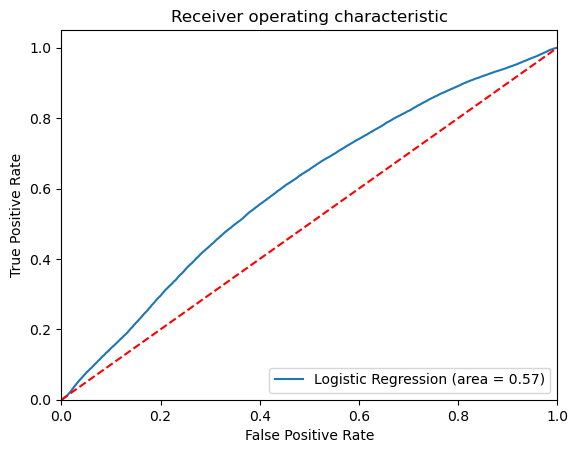

In [135]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test_sm, logreg.predict(x_test_sm))
fpr, tpr, thresholds = roc_curve(y_test_sm, logreg.predict_proba(x_test_sm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()